In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist, cifar10, cifar100

from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from tensorflow.keras.optimizers import SGD
import numpy as np
from numpy import save
from numpy import asarray
from numpy import load
import random

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [3]:
img_rows, img_cols, channels = 28, 28, 1
num_classes = 10

x_train = x_train.reshape((x_train.shape[0], img_rows, img_cols, channels))
x_test = x_test.reshape((x_test.shape[0], img_rows, img_cols, channels))

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

print("Data shapes", x_test.shape, y_test.shape, x_train.shape, y_train.shape)

Data shapes (10000, 28, 28, 1) (10000, 10) (60000, 28, 28, 1) (60000, 10)


In [4]:
def create_model():
        model = Sequential()
        model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, channels), activation='relu'))
        model.add(Conv2D(32, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(num_classes, activation='softmax'))
        sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu', input_shape=(img_rows, img_cols, channels)))
#     model.add(Conv2D(64, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(64, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Flatten())
#     model.add(Dense(32))
#     model.add(Dropout(0.2))
#     model.add(Dense(32))
#     model.add(Dropout(0.2))
#     model.add(Dense(num_classes, activation='softmax'))
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

model = create_model()

In [5]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 407us/sample - loss: 1.3176 - accuracy: 0.5378 - val_loss: 0.1951 - val_accuracy: 0.9393
Epoch 2/10
60000/60000 [==============================] - 35s 578us/sample - loss: 0.2309 - accuracy: 0.9294 - val_loss: 0.0898 - val_accuracy: 0.9725
Epoch 3/10
60000/60000 [==============================] - 39s 654us/sample - loss: 0.1422 - accuracy: 0.9571 - val_loss: 0.0631 - val_accuracy: 0.9795
Epoch 4/10
60000/60000 [==============================] - 39s 655us/sample - loss: 0.1113 - accuracy: 0.9666 - val_loss: 0.0475 - val_accuracy: 0.9849
Epoch 5/10
60000/60000 [==============================] - 39s 651us/sample - loss: 0.0907 - accuracy: 0.9730 - val_loss: 0.0396 - val_accuracy: 0.9877
Epoch 6/10
60000/60000 [==============================] - 39s 657us/sample - loss: 0.0783 - accuracy: 0.9763 - val_loss: 0.0349 - val_accuracy: 0.9891
Epoch 7/10
60000/60000 [====================

In [6]:
m1=tf.keras.models.clone_model(model)
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
m1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# m1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m1.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test))
m1.save('final_model_clean.h5')


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 54s 906us/sample - loss: 1.3823 - accuracy: 0.5194 - val_loss: 0.1868 - val_accuracy: 0.9418
Epoch 2/10
60000/60000 [==============================] - 54s 900us/sample - loss: 0.2368 - accuracy: 0.9279 - val_loss: 0.0894 - val_accuracy: 0.9702
Epoch 3/10
60000/60000 [==============================] - 53s 878us/sample - loss: 0.1493 - accuracy: 0.9558 - val_loss: 0.0704 - val_accuracy: 0.9778
Epoch 4/10
60000/60000 [==============================] - 54s 902us/sample - loss: 0.1125 - accuracy: 0.9659 - val_loss: 0.0515 - val_accuracy: 0.9839
Epoch 5/10
60000/60000 [==============================] - 53s 884us/sample - loss: 0.0958 - accuracy: 0.9719 - val_loss: 0.0458 - val_accuracy: 0.9845
Epoch 6/10
60000/60000 [==============================] - 54s 902us/sample - loss: 0.0807 - accuracy: 0.9757 - val_loss: 0.0384 - val_accuracy: 0.9875
Epoch 7/10
60000/60000 [====================

In [7]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Base accuracy on regular images:", acc)
print("Base loss on regular images:", loss)

Base accuracy on regular images: 0.9924
Base loss on regular images: 0.024030854113490204


In [8]:
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.categorical_crossentropy(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

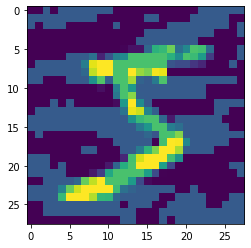

In [9]:
image = x_train[0]
image_label = y_train[0]
perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
adversarial = image + perturbations * 0.2
if channels == 1:
    plt.imshow(adversarial.reshape((img_rows, img_cols)))
else:
    plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))
plt.show()

In [10]:
# print(labels[model.predict(image.reshape((1, img_rows, img_cols, channels))).argmax()])
# print(labels[model.predict(adversarial).argmax()])

In [11]:

def generate_adversarials(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            #N = random.randint(0, 100)

            label = y_test[batch]
            image = x_test[batch]
            
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label).numpy()
            
            
            epsilon = 0.3
            adversarial = image + perturbations * epsilon
            
            x.append(adversarial)
            y.append(y_test[batch])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y

In [12]:
x_adversarial_test, y_adversarial_test = next(generate_adversarials(10000))

In [13]:
loss1, acc1 = model.evaluate(x_test, y_test, verbose=0)
print("Base accuracy on regular images:", acc1)
print("Base loss on regular images:", loss1)
loss2, acc2 = model.evaluate(x_adversarial_test, y_adversarial_test, verbose=0)
print("Base accuracy on adversarial images:",acc2)
print('Base loss on adversarial images:', loss2)

Base accuracy on regular images: 0.9924
Base loss on regular images: 0.024030854113490204
Base accuracy on adversarial images: 0.1189
Base loss on adversarial images: 4.465695142364502


In [14]:
save('adversarial_test_images',x_adversarial_test)
save('adversarial_test_labels',y_adversarial_test)
save('clean_test_images',x_test)
save('clean_test_labels',y_test)
model.save('final_model_adv.h5')